# Lab 01 session: Using MatPlotLib, Seaborn, Altair and Tableau for visualisation

**Idiom-based**: [MatPlotLib](https://matplotlib.org/) is a quite basic plotting library that is popular and the basis for many other plotting libraries in Python. [Seaborn](https://seaborn.pydata.org/) is a more advanced visualisation libary. Both are idiom-based libraries in that they have separate functions for different types of visualisation (idiom).

**Grammar-based**: [Altair](https://altair-viz.github.io/) (a Python port of JavaScript's [VegaLite](https://vega.github.io/vega-lite/)). Tableau is **non-Python stand-alone** software driven by a graphical user interface which is grammar-based.

## Documentation

You'll find full documentation online on the library websites (go and find them). The documentation is the best systematic way of finding out details of how to use the library. However, summaries, examples and cheatsheets are often best to get a grasp of how these work. These libraries are widely used, so you'll find lots of help online. Here are some ideas.

 - **MatPlotLib**: The [cheatsheets](https://matplotlib.org/cheatsheets/) are a great summary of what types of plot (idioms) are supported and how to used them.
 - **Seaborn**: Seaborn don't have any of their own cheatsheets, but others have made some, including these from [Kaggle](https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts)
 - **Altair**: Altair also don't seems to have their own cheatsheets, but their [examples](https://altair-viz.github.io/gallery/index.html) are a good way to get started.
 - **Tableau**: Tableau has lots of official support (it's commercial software) and there's a tutorial here: https://help.tableau.com/current/guides/get-started-tutorial/en-us/get-started-tutorial-home.htm
 
 ## Data
 
 For this examples, we will use some Seattle weather data, one of the example datasets supplied by Altair. You can load it into a Pandas dataframe in the following way and display the top 5 rows:

In [1]:
from vega_datasets import data

weather_data = data.seattle_weather()
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


The nominal weather categories are as follows:

In [2]:
weather_data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

## Scatterplots

Scatterplots are a visualisation technique for looking at pairwise relationships between variables. Each plot is a record (row) and each axis is a variable (column).

They use the *x-position* and *y-position* visual variables which are the more effective for quantitative data. Additionally, *hue* and *shape* are regularly used to convey *nominal* data and *lightness* to convey quantitative data. 

### MatPlotLib

We used MatPlotLib `scatter()` function, giving at an array of x-values, y-values and (optionally colour-values. Note that you will have to label the axes yourself and then call `plt.show()` to show it.

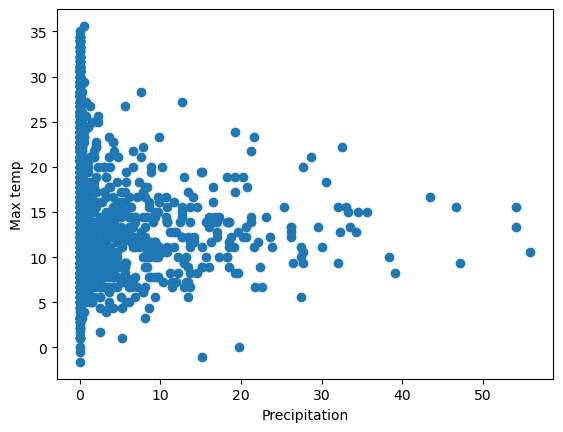

In [3]:
import matplotlib.pyplot as plt

plt.scatter(weather_data.precipitation,weather_data.temp_max)
plt.xlabel('Precipitation')
plt.ylabel('Max temp')
plt.show()

 See the documentation for additional *kwargs* (keyword arguments). Below, we assign a *hue* to each weather type in a *dictionary* (`colour_lookup`), use this to create a column (`colour_column`) and then use the `color` *kwargs* (keyword argument).

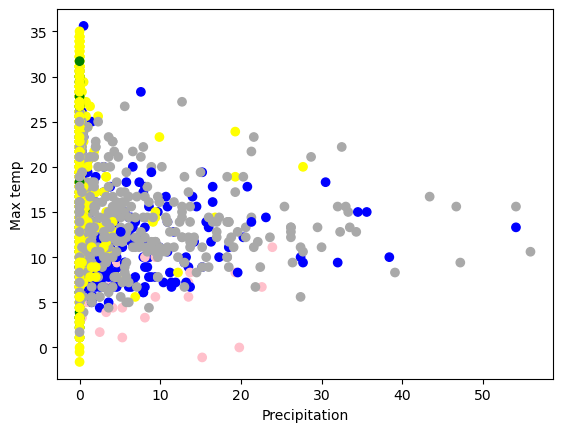

In [4]:
colour_lookup={'drizzle':'green', 'rain':'blue', 'sun':'yellow', 'snow': 'pink', 'fog':'darkgray'}
colour_column=[ colour_lookup[i] for i in weather_data['weather'] ]

plt.scatter(weather_data.precipitation,weather_data.temp_max,color=colour_column)
plt.xlabel('Precipitation')
plt.ylabel('Max temp')
plt.show()


### Seaborn

**Seaborn** is also idiom-based, so it has different functions for different types of visualisation techniques. Here we used `scatterplot().`

In Seaborn you supply the entire Pandas dataframe, and then tell it which columns you want to use. This means it can label axes for you. It will also automatically assign hues for you, though you can use *kwargs* (keyword arguments) to override this.

<Axes: xlabel='precipitation', ylabel='temp_max'>

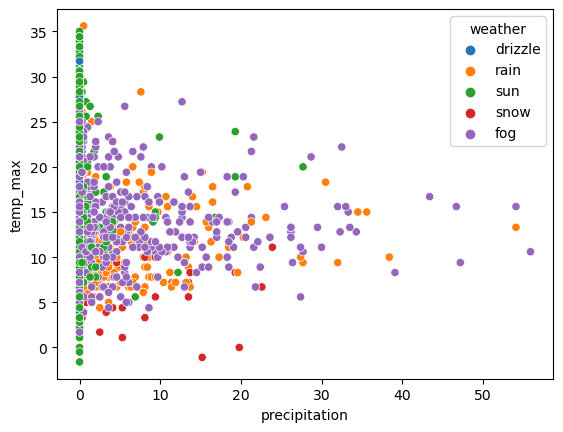

In [5]:
import seaborn as sns

sns.scatterplot(x="precipitation", y="temp_max", data=weather_data, hue="weather")

### Altair

Altair is grammar-based, rather than specifying the type, we specify the:
 - mark type
 - the mapping between visual variables and data variable (columns).
 
Check the version (5.1.1 is the latest). If you need to upgrade, you can use `pip install -U altair vega_datasets`

In [6]:
import altair as alt

alt.__version__

'5.1.1'

Below is the simplest use of Altair using a **shortcut** approach:
 - specify the data in `Chart`
 - specify the mark type as `mark_point()`
 - specify the mappings between visual variables and data variables within `encode()`

In [7]:
import altair as alt

alt.Chart(weather_data).mark_point().encode(
    x='precipitation',
    y='temp_max',
    color='weather'
)

alt.Chart(...)

This is the **expanded version** which you need specify more detail (here, we specify titles). Otherwise, it looks the same.

In [8]:
import altair as alt

alt.Chart(weather_data).mark_point().encode(
  alt.X('precipitation').title("Precipitation (mm)"),
  alt.Y('temp_max').title("Maximum temperature (C)"),
  alt.Color('weather')
)

alt.Chart(...)

In [9]:
weather_data.to_csv("weather_data.csv",index=False)

### Tableau

Tableau is (non-Python) stand-alone software driven by a graphical user interface which is grammar-based. The csv file has been exported into this directory (see above) and you can load that in Tableau.

 - Drag the file onto the Tableau window. You'll see a preview in the `data source` window
 - Click on `Sheet 1` to go to a new worksheet
 - On the left, you'll see `dimensions` (categorical variables; blue) and `measures` (quantitative variables; green)
 - map the variables to the visual variables
   - Drag the `Precipitation` variable to the `columns shelf` (x-position)
   - Drag `Temp Max` variable to the `rows shelf` (y-position)
   - Drag the "Weather" variable to the `colour shelf`
   - Go to the `analysis` menu and turn off `aggregate measures`
   - Double-click on the `shelves` (colour, size, etc) to customise.
   - Add a new sheet to try something else

(Image below is base64 encoded using https://www.base64-image.de/ so it exports properly)

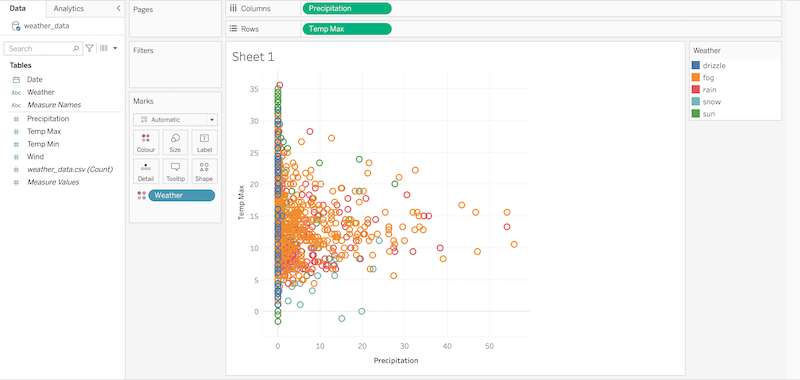

## Task 1: Critique the scatterplots

What do these seem to show? Any problems that might affect interpretation?


The scatterplots seem to show that there were a lot of days with little or no rain and then quite a spread of rainy / warms days. 
The issue I have found with them is there is no date context, so I don't know whether the rain was due to the season or whether it was a particularly wet summer, the same applies to the temperature.

### Task 2: How can you improve this?

Using one or more of the libraries/software above, try and improve them, using Google searches and the documentation. You might want to try:
 - Changing the size of the dots/circles
 - Making them semi-transparent/opaque
 - Aggregating (e.g. one mark per weather type and using the average precipitation/temperature for each weather type?
 - Using binning to make a histogram or binned scatterplot.

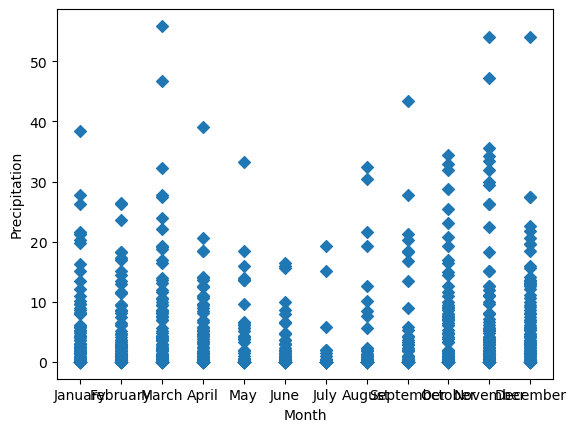

In [10]:
import pandas as pd

weather_data['month'] = pd.DatetimeIndex(weather_data['date']).month_name()

plt.scatter(weather_data.month, weather_data.precipitation, marker='D')
#plt.scatter(weather_data.month, weather_data.temp_max, marker='s')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.show()

### Task 3: Explore, interpret and critique

To prepare you for your **group coursework**, use [this tutorial](https://altair-viz.github.io/case_studies/exploring-weather.html#) as inspiration to come up with visual representation designs of the Seattle weather data that convey different aspects of the data. For each design:
 - **Implement**: implement it using whichever sorfware you like
 - **Purpose**: Say what the intended purpose is
 - **Justify**: Justify the design in terms of effectiveness of visual variables for its intended purpose
 - **Critique**: the design and give limitations
 - **Interpret**: what insights does the graphic provide?
 
Here's an example:

In [13]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])


alt.Chart(weather_data).mark_point().encode(
    alt.X('month(date):N').title('Maximum Daily Temperature (C)'),
    alt.Y('temp_max').title('Daily Temperature Range (C)'),
    alt.Color('weather').scale(scale),
    alt.Size('precipitation').scale(range=[1, 200])
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=1800,
    height=1200
).interactive()


# alt.Chart(weather_data).mark_bar().encode(
#     x='month(date):N',
#     y='count()',
#     color='weather',
# )


brush = alt.selection_interval()

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q').title('Maximum Daily Temperature (C)'),
    alt.Y('temp_range:Q').title('Daily Temperature Range (C)'),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q').scale(range=[1, 200])
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=1800,
    height=1200
).add_params(
    brush
)

bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='month(date):N',
    color=alt.Color('weather:N').scale(scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=1200
)

alt.vconcat(points, bars, data=weather_data)

alt.VConcatChart(...)

 - **Purpose**: Compare the number of days of weather type per month, across the three years of data.
 - **Justification**: Aligned length is the most effective visual variable for enabing quantities to be compared. Hue is an effective visual variable for a nominal variable such as weather type with only a few variable values (five). Months are ordered temporally to help reveal temporal trends.
 - **Critique**: It might be better to consider proportions rather than number of days as different months have different numbers of days. We also don't see whether this differs by year.
 - **Interpret**: It shows that there are many more sunny days in the summer months. There seem to be a strong seasonal difference with similar numbers of sunny days in winter days and similar numbers of sunny days in summer days. The are similar drizzle days each month.

**Tips**
 - Use any library/software you like. If you use Tableau, you may refer to do this in a Word document
 - Use good design principles, including
   - use the most effective visual variables for the most important data variables for the intended purpose
     - use position and length for the most important data variables
   - use suitable visual variables for the variables/purpose
     - hue or shape for nominal variables where there are limited variable values
     - lightness for ordinal and quantitative
   - avoid overlapping data points
     - opacity
     - bin
     - facet
     - filter
   - use appropriate axis ranges (best if they start at zero and best if outliers don't dominate)
 - Consider variation in the data that goes beyond high-level summaries
 - Consider superimposing, juxtaposing and facetting
 - Consider using Pandas to filter or transform the data. The tutorial contains examples of Altair's built-in ways of transforming data, but I would advise for stick to Pandas if you can (this is a more useful skill!). Examples
   - calculating the temperature range between the minimum and maximum
   - calculating difference from an average
   - grouping and summarising

(Answer here)